In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pylab as pl
import csv # csv module
import warnings #for disable purpose
import seaborn as sns #library for making statistical graphics
import os # for current directory
import glob
from sklearn.tree import DecisionTreeClassifier #For predict decision trees
from sklearn.model_selection import train_test_split, GridSearchCV #Split data
from sklearn.ensemble import RandomForestClassifier#Random forests
from sklearn import datasets #Random forests
from sklearn.cluster import KMeans #Library for clusters
from sklearn.preprocessing import MinMaxScaler#Used in clusters
from scipy import stats#for correlation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pathlib import Path
warnings.filterwarnings('ignore')
from matplotlib.ticker import FuncFormatter

In [4]:
#Verify missing values on the data set
base_dir = Path.home()
csv_path = base_dir / "NaMinhaRua" / "Ficheiros de dados Manipulados"
gopidataset = pd.read_csv(csv_path/ 'combined_sorted_ym.gopi_data.csv')
gopidataset = pd.DataFrame(gopidataset)
print ("\nMissing values :  ", gopidataset.isnull().sum().values.sum())
nan_values_year = gopidataset['year'].isna().sum()  #gopidataset['year'].isnull()
nan_values_month = gopidataset['month'].isna().sum()  #gopidataset['month'].isnull()

# Print rows where 'month' column has NaN values
print(nan_values_year)
print(nan_values_month)


Missing values :   0
0
0


In [5]:
#RowsXColumns Info
print("\nData base dimensions :", gopidataset.shape)
print("\nData base info:")
gopidataset.info()


Data base dimensions : (774072, 9)

Data base info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774072 entries, 0 to 774071
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_registo           774072 non-null  object 
 1   area                 774072 non-null  object 
 2   tipo                 774072 non-null  object 
 3   Subseccao            774072 non-null  int64  
 4   Freguesia            774072 non-null  object 
 5   Longitude_Subseccao  774072 non-null  float64
 6   Latitude_Subseccao   774072 non-null  float64
 7   month                774072 non-null  int64  
 8   year                 774072 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 53.2+ MB


In [6]:
gopidataset.head(2)

,dt_registo,area,tipo,Subseccao,Freguesia,Longitude_Subseccao,Latitude_Subseccao,month,year
0,2018-01-01,Iluminação Pública,Candeeiro apagado,11066202005,Parque das Nações,-9.092716,38.779538,1,2018
1,2018-01-01,Árvores e Espaços Verdes,"Árvores, arbustos ou relva - Manutenção",11061802202,Lumiar,-9.157347,38.772386,1,2018


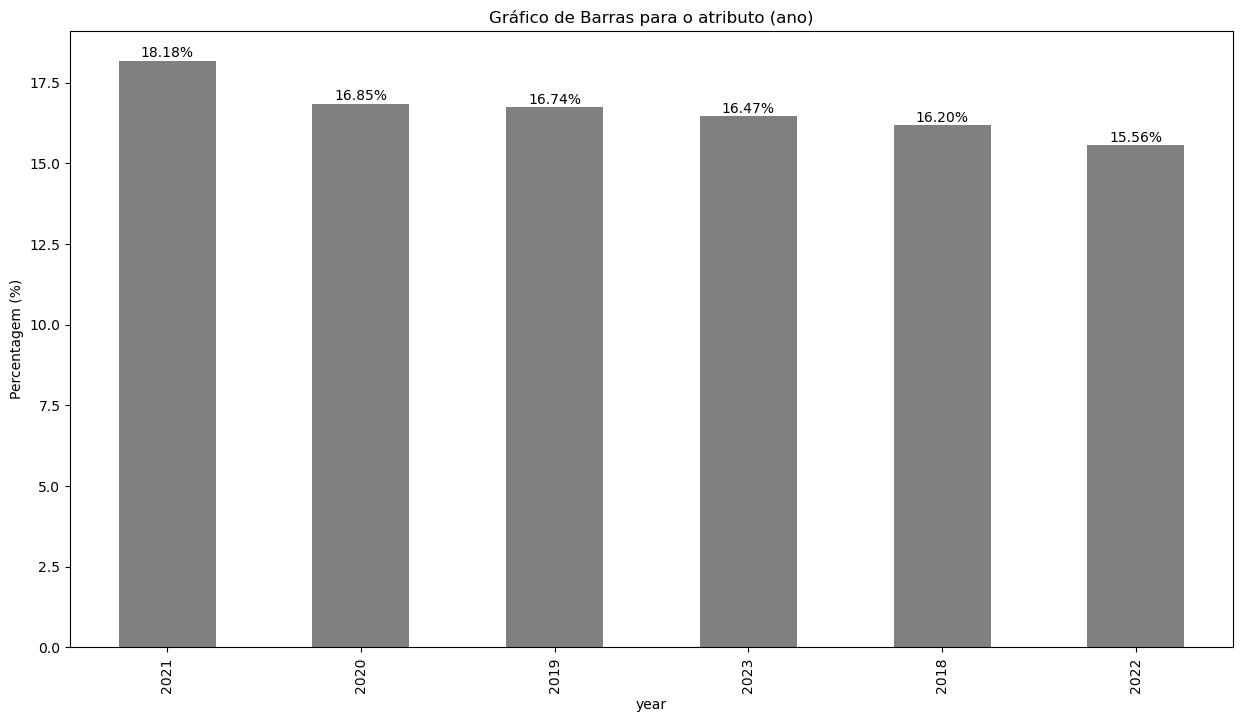

In [7]:
##############################################Frequency/Year ################################################

value_counts = gopidataset.year.value_counts()

# Calculate %
percentages = (value_counts  / len(gopidataset)) * 100


# Create bar chart
plt.figure(figsize=(15, 8))
percentages.plot(kind='bar', color='grey')

# Add title and labels
plt.xlabel('year')
plt.ylabel('Percentagem (%)')
plt.title('Gráfico de Barras para o atributo (ano)')

# Add % at the top of the bar
for index, value in enumerate(percentages):
    plt.text(index, value + 0.1, f'{value:.2f}%', ha='center')

# Show plot
plt.show()

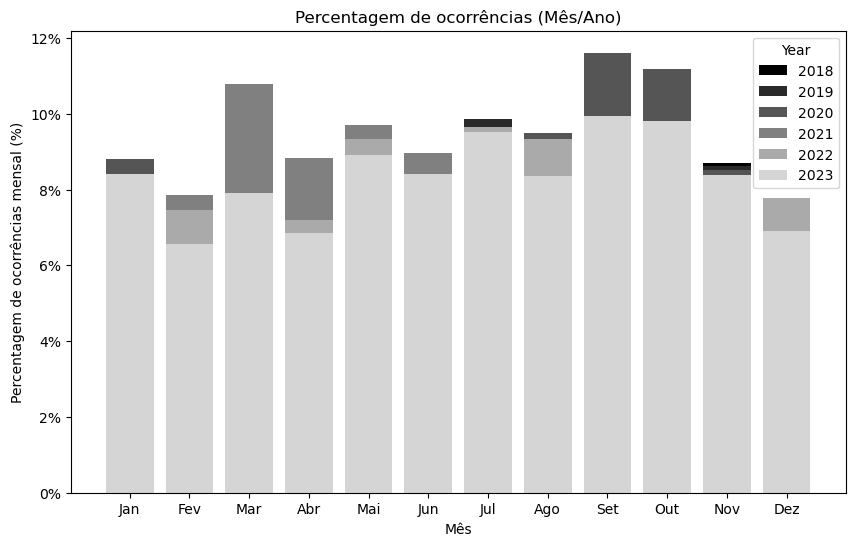

In [9]:
############################## Check the frequency of month on the respective year###################################
# Calculate frequency of occurrences by year and month
frequency = gopidataset.groupby(['year', 'month']).size().reset_index(name='count')

# Group by year and calculate the total entries per year
total_entries_per_year = gopidataset.groupby('year').size()

# Calculate the percentage contribution of each month within its respective year
frequency['percentage'] = frequency.apply(lambda row: 100 * row['count'] / total_entries_per_year[row['year']], axis=1)

# Define a range of grey shades by year
num_years = len(set(frequency['year']))
colors = [plt.cm.gray(i / num_years) for i in range(num_years)]

# Bar graph
plt.figure(figsize=(10, 6))
for i, year in enumerate(sorted(set(frequency['year']))):
    # Filter data for the current year
    year_data = frequency[frequency['year'] == year]
    
    # Plot the bars, x-values are months
    plt.bar(year_data['month'], year_data['percentage'], label=str(year), color=colors[i])

# Format Y axis with percentage
formatter = FuncFormatter(lambda y, _: f'{y:.0f}%')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Mês')
plt.ylabel('Percentagem de ocorrências mensal (%)')
plt.title('Percentagem de ocorrências (Mês/Ano)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])  # X-axis labels for months
plt.legend(title='Year')
plt.show()

In [11]:
############################## Check the frequency of month on the respective year###################################

# Calculate frequency of occurrences by year and month
frequency = gopidataset.groupby(['year', 'month']).size().reset_index(name='count')

# Group by year and calculate the total entries per year
total_entries_per_year = gopidataset.groupby('year').size()

# Calculate the percentage contribution of each month within its respective year
frequency['percentage'] = frequency.apply(lambda row: 100 * row['count'] / total_entries_per_year[row['year']], axis=1)

# Create a DataFrame to display the information
table_data = []
for year in sorted(set(frequency['year'])):
    year_data = frequency[frequency['year'] == year][['month', 'percentage']].set_index('month')
    year_data.columns = [f'{year} (%)']  # Rename column to include the year
    table_data.append(year_data)

# Concatenate the DataFrame for each year
table = pd.concat(table_data, axis=1)

# Display the table
print(table)

        2018 (%)  2019 (%)   2020 (%)   2021 (%)  2022 (%)  2023 (%)
month                                                               
1       7.696296  8.127320   8.813247   7.635692  7.417772  8.411889
2       6.479118  7.641070   7.651027   7.863740  7.456800  6.555564
3       6.891491  7.694326   5.748237  10.784314  7.711726  7.905262
4       6.983218  7.547680   3.767249   8.840580  7.206856  6.859854
5       8.313659  8.975556   7.692426   9.698068  9.333455  8.925574
6       8.218741  7.987620   8.218338   8.974140  8.041386  8.420516
7       9.381680  9.872417   9.626648   9.381927  9.650660  9.514548
8       9.347382  8.155878   9.480221   7.445297  9.323491  8.365618
9      10.496762  9.166197  11.611469   8.615374  9.421475  9.938044
10     10.161759  8.967066  11.174486   7.392015  8.746377  9.800800
11      8.690936  8.625148   8.512726   7.299659  7.918490  8.396988
12      7.338959  7.239721   7.703925   6.069196  7.771513  6.905341


In [13]:
# Filter the dataset for the area "Higiene e segurança"
higiene_seguranca_data = gopidataset[gopidataset['area'] == 'Higiene Urbana']
# Calculate total number of entries in the area
total_entries = len(higiene_seguranca_data)

# Get the frequency of the attribute "tipo"
if total_entries > 0:
    tipo_frequency = higiene_seguranca_data['tipo'].value_counts()  # Calculate frequency of 'tipo'
# calculate %   
tipo_percentage = (tipo_frequency / total_entries) * 100

# Display the frequency
print(tipo_percentage)

tipo
Remoção-Monstros-Pedido de recolha                                                         46.544994
Entulhos, objetos volumosos, resíduos de jardim ou perigosos abandonados na via pública    17.894621
Remoção-Jardins-Pedido de recolha                                                           3.845018
Pragas e doenças                                                                            3.804865
Reclamações no âmbito da recolha diária de resíduos sólidos urbanos                         3.322482
Grafitis                                                                                    3.080660
Limpeza da via pública (Despejo de papeleira, varredura e lavagem da via pública)           2.878992
Remoção Seletivas - Remoção pontual de papel/cartão                                         2.274528
Contentores de resíduos danificados                                                         2.228792
Sacos ou outros lixos abandonados                                                     

In [14]:
tipos_por_area = {}

# Iterate over the data and count the unique types by area
for index, row in gopidataset.iterrows():
    area = row["area"]
    tipo = row["tipo"]
    if area in tipos_por_area:
        if tipo not in tipos_por_area[area]:
            tipos_por_area[area].append(tipo)
    else:
        tipos_por_area[area] = [tipo]

# Exibir o resultado
for area, tipos in tipos_por_area.items():
    print(f"Área: {area}, Tipos Únicos: {len(tipos)}")

Área: Iluminação Pública, Tipos Únicos: 14
Área: Árvores e Espaços Verdes, Tipos Únicos: 28
Área: Higiene Urbana, Tipos Únicos: 54
Área: Passeios e Acessibilidades, Tipos Únicos: 45
Área: Segurança Pública e Ruído, Tipos Únicos: 22
Área: Estradas e Ciclovias, Tipos Únicos: 52
Área: Estradas e Sinalização, Tipos Únicos: 64
Área: Saneamento, Tipos Únicos: 18
Área: Animais em ambiente urbano, Tipos Únicos: 14


In [15]:
# Função para imprimir tipos exclusivamente para uma área específica
def imprimir_tipos_para_area(area_desejada):
    tipos_para_area = gopidataset[gopidataset['area'] == area_desejada]['tipo'].unique()
    print(f"Tipos para a área '{area_desejada}':")
    for tipo in tipos_para_area:
        print(tipo)

# Exemplo de uso
imprimir_tipos_para_area("Estradas e Sinalização")

Tipos para a área 'Estradas e Sinalização':
Sinalização vertical
Novos sinais de trânsito e outra sinalização vertical
Buraco na faixa de rodagem - Betuminoso
Sinais de trânsito e outra sinalização vertical - Manutenção
Reconstrução
Semáforos e sinais luminosos em falta ou para manutenção
Novos dispositivos complementares (Balizadores,...)
Repavimentação
Concessionárias - Danos e obras
Buraco na faixa de rodagem - Cubos
Reclamações no âmbito da gestão de trânsito
Novas Passadeiras ou outras sinalizações horizontais
Repintura de passadeiras ou outras sinalizações horizontais
Viadutos, passagens superiores e inferiores - Estrutura
Abatimentos superficiais
Sinalização informativa e/ou turística
Buraco envolvente à tampa de saneamento - Betuminoso
Pilaretes
Viadutos, passagens superiores e inferiores - Manutenção
Dispositivos complementares (Balizadores,...) - Manutenção
Cubos
Sinalização horizontal
Manutenção de Equipamento
Separadores e proteções de faixa de rodagem
Separadores e proteçõ